In [8]:
# Import all the necessary libraries.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib notebook

In [9]:
# Sets the number of examples.
M = 100

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

#Noise Function
n = np.random.normal(0, 1, (M, 1))

# Create target function and its noisy version.
x = np.random.uniform(-3, 3, (M,1))
y = 2 + x + 0.5*x*x
y_noisy = y + n

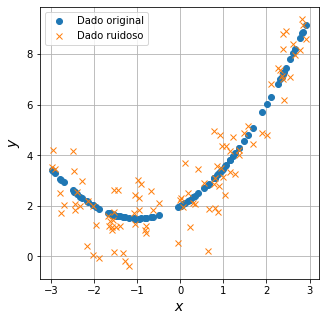

In [10]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'o', label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [11]:
# Polynomial order.
model_order = 90

In [12]:
# Regularization factor.
lambdas = np.linspace (10**-10, 1, 1000)

# Ridge

In [29]:
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.7, random_state=42)

error_train = []
error_val = []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Ridge(alpha=lambdas[i], solver="cholesky")
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x_train, y_train)
    # Predict.
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    
    error_train.append(mean_squared_error(y_train, y_train_predict))
    error_val.append(mean_squared_error(y_val, y_val_predict))
    
    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        best_epoch = i
        best_model = clone(model)
        best_lambda = lambdas[i]
        
print('best_epoch:',best_epoch)
print('best_lambda:',best_lambda)
print('minimum_val_error:',minimum_val_error)

best_epoch: 126
best_lambda: 0.12612612621351352
minimum_val_error: 0.7896033774883865


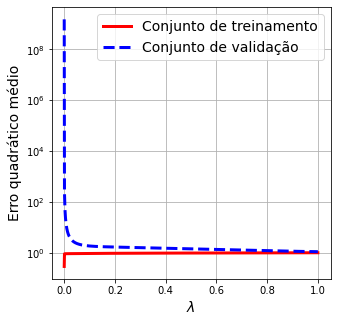

In [30]:
fig = plt.figure(figsize=(5,5))

plt.plot(lambdas, error_train, "r-", linewidth=3, label="Conjunto de treinamento")
plt.plot(lambdas, error_val, "b--", linewidth=3, label="Conjunto de validação")
plt.legend(loc="upper right", fontsize=14)
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()

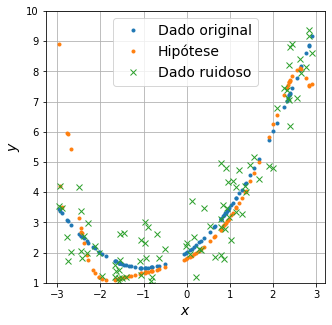

In [34]:
# Train model.
best_model.fit(x_train, y_train)

fig = plt.figure(figsize=(5,5))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x, best_model.predict(x), '.', label='Hipótese')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.ylim([1, 10])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [35]:
best_ridge_weights = best_model.named_steps.reg.coef_

In [36]:
print('Pesos encontrados durante o treinamento do modelo com o menor erro de validação')
print(best_ridge_weights)

Pesos encontrados durante o treinamento do modelo com o menor erro de validação
[[ 0.          1.36460636  1.20273241  1.4682412  -0.19892658  0.25322937
   0.1682143  -0.51171994  0.4367584  -0.75726429  0.4463532  -0.70762135
   0.32872247 -0.54255287  0.18622002 -0.35893611  0.06353198 -0.19665678
  -0.02825719 -0.06673382 -0.09182069  0.03172026 -0.1335278   0.10340363
  -0.15948283  0.15353471 -0.17441751  0.18674406 -0.18168016  0.20683563
  -0.1835401   0.21684433 -0.18151126  0.21916622 -0.17660775  0.21568596
  -0.16952284  0.20788242 -0.16074637  0.19691208 -0.15063888  0.18367472
  -0.13947716  0.16886563 -0.1274819   0.15301748 -0.11483439  0.13653436
  -0.10168669  0.11971928 -0.088168    0.10279656 -0.07438879  0.08592972
  -0.06044373  0.06923586 -0.04641382  0.052797   -0.03236815  0.0366689
  -0.01836536  0.02088795 -0.0044549   0.00547644  0.00932185 -0.00955352
   0.02293053 -0.02419696  0.03634289 -0.03845389  0.049536   -0.0523277
   0.0624915  -0.06582397  0.07519

# Lasso

In [38]:
error_train = []
error_val = []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x_train, y_train)
    # Predict.
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    
    error_train.append(mean_squared_error(y_train, y_train_predict))
    error_val.append(mean_squared_error(y_val, y_val_predict))
    
    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        best_epoch = i
        best_model = clone(model)
        best_lambda = lambdas[i]
        
print('best_epoch:',best_epoch)
print('best_lambda:',best_lambda)
print('minimum_val_error:',minimum_val_error)

best_epoch: 126
best_lambda: 0.12612612621351352
minimum_val_error: 0.7896033774883865


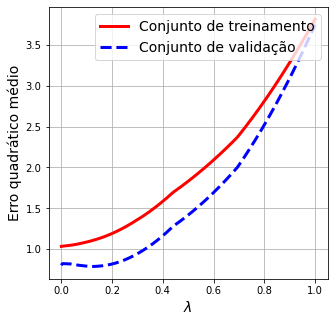

In [40]:
fig = plt.figure(figsize=(5,5))

plt.plot(lambdas, error_train, "r-", linewidth=3, label="Conjunto de treinamento")
plt.plot(lambdas, error_val, "b--", linewidth=3, label="Conjunto de validação")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()

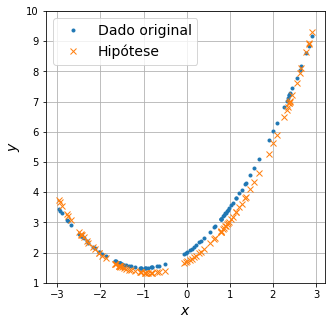

In [41]:
# Train model.
best_model.fit(x_train, y_train)

fig = plt.figure(figsize=(5,5))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x, best_model.predict(x), 'x', label='Hipótese')
plt.ylim([1, 10])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [43]:
best_ridge_weights = best_model.named_steps.reg.coef_


print('Pesos encontrados durante o treinamento do modelo com o menor erro de validação')
print(best_ridge_weights)

Pesos encontrados durante o treinamento do modelo com o menor erro de validação
[ 0.          1.4926078   1.28483413  0.17181605  0.14300622  0.
  0.03473013  0.          0.00150173 -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.      

# Letra j)

In [ ]:
'''
Pode ser notado que ao utilizar a regressão de Lasso, a maioria dos pesos é zerado, enquanto que ao usar a de Ridge, a maioria
tem um valor muito pequeno atribuído. Isso ocorre devido a seleção de variáveis que é possível na técnica de LASSO.

'''